In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define image size and batch size
IMG_SIZE = 224
BATCH_SIZE = 32

In [ ]:
# Define data generators for train, validation and test sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/train1',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)


Found 16 images belonging to 2 classes.


In [ ]:
val_generator = train_datagen.flow_from_directory(
    '//content/drive/MyDrive/train1',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)


Found 4 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/test1',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 10 images belonging to 1 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define the model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,validation_data=val_generator,epochs=5)

Epoch 1/5
1/1 [==============================] - 5s 5s/step - loss: 0.6868 - accuracy: 0.5625 - val_loss: 1.1323 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 2s 2s/step - loss: 1.0657 - accuracy: 0.5000 - val_loss: 5.3136 - val_accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 2s 2s/step - loss: 5.3633 - accuracy: 0.5000 - val_loss: 2.3067 - val_accuracy: 0.5000
Epoch 4/5
1/1 [==============================] - 2s 2s/step - loss: 2.1002 - accuracy: 0.5000 - val_loss: 0.6660 - val_accuracy: 0.5000
Epoch 5/5
1/1 [==============================] - 2s 2s/step - loss: 0.5239 - accuracy: 0.5000 - val_loss: 0.7534 - val_accuracy: 0.5000


In [ ]:
model.save("Model.h5","label.txt")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#test your image
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

#load the model
model = load_model('/content/Model.h5')
#classes
class_names = ['Raw mango','riple mango']
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

In [ ]:
image = Image.open("/content/drive/MyDrive/train1/raw mangos/m7.jpg").convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

In [ ]:
# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
confidence_score = prediction[0][index]
# Print prediction and confidence score
print("Result: ", class_names[index], end="")
print("\n")
print("Accuracy: ", confidence_score)

1/1 [==============================] - 0s 105ms/step
Result:  Raw mango

Accuracy:  0.15623291


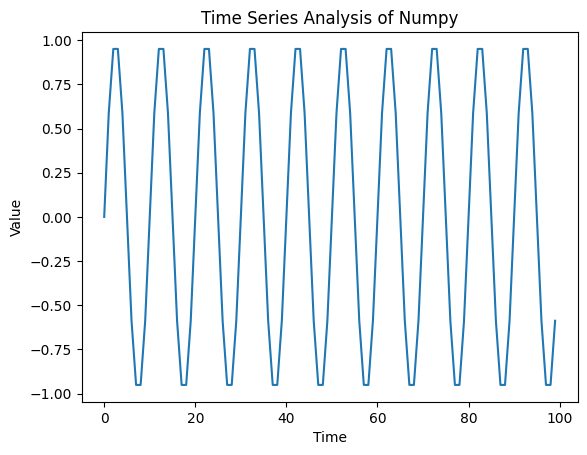

ADF Statistic: -796542820616499.1
p-value: 0.0


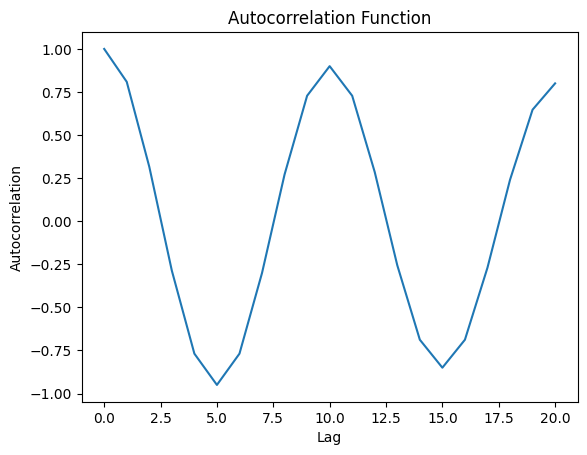

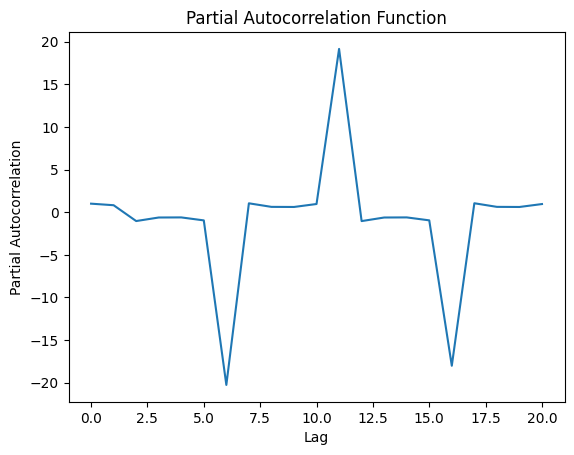

In [1]:
# prompt: time series analysis of numpy

import numpy as np
import matplotlib.pyplot as plt

# Create a time series
time = np.arange(0, 100)
data = np.sin(2 * np.pi * time / 10)

# Plot the time series
plt.plot(time, data)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Analysis of Numpy')
plt.show()

# Perform time series analysis
from statsmodels.tsa.stattools import adfuller

# Test for stationarity
adf_result = adfuller(data)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

# Autocorrelation and partial autocorrelation
from statsmodels.tsa.stattools import acf, pacf

acf_result = acf(data)
pacf_result = pacf(data)

# Plot the autocorrelation and partial autocorrelation functions
plt.plot(acf_result)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function')
plt.show()

plt.plot(pacf_result)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function')
plt.show()